In [1]:
%matplotlib inline

In [111]:
from astropy.table import Table
data = Table.read('/home/jls/public_html/data/gaia_spectro.hdf5')
dataE = Table.read('/data/jls/GaiaDR2/spectro/input_photometry_and_spectroscopy.hdf5')

In [241]:
def turnoff(d):
    return (d['logg']<4.5)&(d['logg']>3.6)&(d['log10_teff']<4.1)
#     return (d['logg']>3.)&(d['log10_teff']>np.log10(5700.))
fltr = (data['s']<1.)&(data['s']>0.3)&(data['flag']==0)&turnoff(data)&(data['log10_av']<-.5)
print np.count_nonzero(fltr)

851890


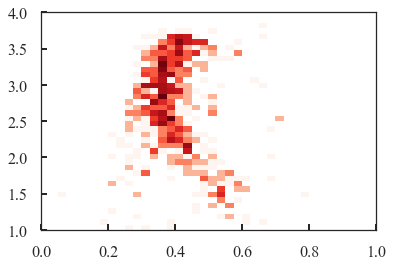

In [132]:
plt.hist2d((dataE['J']-dataE['K'])[(data['vphi']<50.)&(data['Z']>-0.6)&fltr],
           (dataE['K']-data['dm'])[(data['vphi']<50.)&(data['Z']>-0.6)&fltr],
           bins=40,norm=LogNorm(),range=[[0.,1.],[1.,4.]],
          cmap=plt.cm.Reds);

In [271]:
gg = np.genfromtxt('/data/jls/isochrones/PARSEC_Gaia/grid/2mass_spitzer_wise_0.109.dat')
gg2 = np.genfromtxt('/data/jls/isochrones/PARSEC_Gaia/grid/2mass_spitzer_wise_-1.009.dat')

In [269]:
from plotting_general import running_median

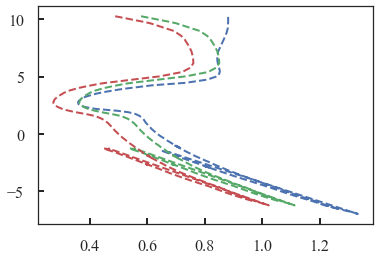

In [290]:
plt.plot((gg.T[8]-gg.T[10])[gg.T[1]==10.],gg.T[10][gg.T[1]==10.],ls='dashed',label='Ref. iso 10Gyr')
plt.plot((gg2.T[8]-gg2.T[10])[gg2.T[1]==10.]+0.09*1.,gg2.T[10][gg2.T[1]==10.],ls='dashed',label='[Fe/H]=-1 10Gyr')
plt.plot((gg2.T[8]-gg2.T[10])[gg2.T[1]==10.],gg2.T[10][gg2.T[1]==10.],ls='dashed',label='[Fe/H]=-1 10Gyr')

(3.7, 1.5)

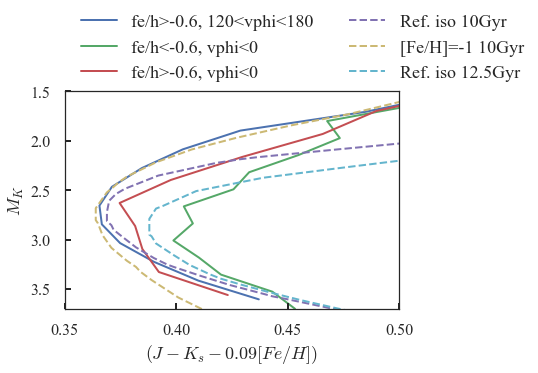

In [288]:
# plt.hist2d((dataE['J']-dataE['K']-0.09*data['Z']-np.power(10.,data['log10_av'])*0.12)[(data['vphi']>120.)&(data['vphi']<180.)&(data['Z']>-0.6)&fltr],
#            (dataE['K']-data['dm']-np.power(10.,data['log10_av'])*0.09)[(data['vphi']>120.)&(data['vphi']<180.)&(data['Z']>-0.6)&fltr],
#            bins=40,norm=LogNorm(),range=[[0.3,0.6],[1.,3.7]],label='120<vphi<180, fe/h>-0.6');
rr=running_median(
           (dataE['K']-data['dm']-np.power(10.,data['log10_av'])*0.09)[(data['vphi']>120.)&(data['vphi']<180.)&(data['Z']>-0.6)&fltr],
    (dataE['J']-dataE['K']-0.09*data['Z']-np.power(10.,data['log10_av'])*0.12)[(data['vphi']>120.)&(data['vphi']<180.)&(data['Z']>-0.6)&fltr])
plt.plot(rr[1],rr[0],label='fe/h>-0.6, 120<vphi<180')


rr=running_median(
           (dataE['K']-data['dm']-np.power(10.,data['log10_av'])*0.09)[(data['vphi']<0.)&(data['Z']<-0.6)&fltr],
    (dataE['J']-dataE['K']-0.09*data['Z']-np.power(10.,data['log10_av'])*0.12)[(data['vphi']<0.)&(data['Z']<-0.6)&fltr])
plt.plot(rr[1],rr[0],label='fe/h<-0.6, vphi<0')
rr=running_median(
           (dataE['K']-data['dm']-np.power(10.,data['log10_av'])*0.09)[(data['vphi']<0.)&(data['Z']>-0.6)&fltr],
    (dataE['J']-dataE['K']-0.09*data['Z']-np.power(10.,data['log10_av'])*0.12)[(data['vphi']<0.)&(data['Z']>-0.6)&fltr])
plt.plot(rr[1],rr[0],label='fe/h>-0.6, vphi<0')
plt.xlim(0.35,0.5)
plt.gca().invert_yaxis()
plt.xlabel(r'$(J-K_s-0.09[Fe/H])$')
plt.ylabel(r'$M_K$')
# plt.plot((gg.T[8]-gg.T[10])[gg.T[1]==9.95]+0.09*0.1,gg.T[10][gg.T[1]==9.95],ls='dashed',label='Ref. iso 9Gyr')
plt.plot((gg.T[8]-gg.T[10])[gg.T[1]==10.]+0.09*0.1,gg.T[10][gg.T[1]==10.],ls='dashed',label='Ref. iso 10Gyr')
plt.plot((gg2.T[8]-gg2.T[10])[gg2.T[1]==10.]+0.09*1.,gg2.T[10][gg2.T[1]==10.],ls='dashed',label='[Fe/H]=-1 10Gyr')
plt.plot((gg.T[8]-gg.T[10])[gg.T[1]==10.1],gg.T[10][gg.T[1]==10.1],ls='dashed',label='Ref. iso 12.5Gyr')
plt.legend(loc=6,bbox_to_anchor=(0.,1.2),ncol=2)

plt.ylim(3.7,1.5)

(0.3, 0.6)

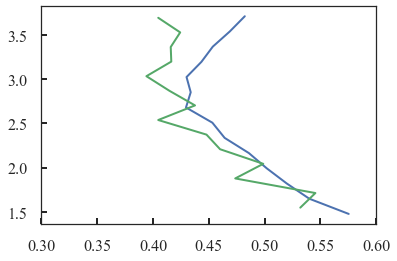

In [225]:
rr=running_median(
           (dataE['K']-data['dm'])[(data['vphi']<0.)&(data['Z']<-0.7)&fltr],
    (dataE['J']-dataE['K']-0.1*data['Z'])[(data['vphi']<0.)&(data['Z']<-0.7)&fltr])
plt.plot(rr[1],rr[0])
rr=running_median(
           (dataE['K']-data['dm'])[(data['vphi']<0.)&(data['Z']<-0.5)&(data['Z']>-0.7)&fltr],
    (dataE['J']-dataE['K']-0.1*data['Z'])[(data['vphi']<0.)&(data['Z']<-0.5)&(data['Z']>-0.7)&fltr])
plt.plot(rr[1],rr[0])
plt.xlim(0.3,0.6)

-0.03730306397410518


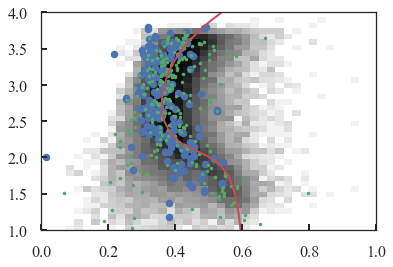

In [173]:
print np.median(data['Z'][(data['vphi']>120.)&(data['vphi']<180.)&(data['Z']>-0.6)&fltr])
plt.hist2d((dataE['J']-dataE['K'])[(data['vphi']>120.)&(data['vphi']<180.)&(data['Z']>-0.6)&fltr],
           (dataE['K']-data['dm'])[(data['vphi']>120.)&(data['vphi']<180.)&(data['Z']>-0.6)&fltr],
           bins=40,norm=LogNorm(),range=[[0.,1.],[1.,4.]],)
plt.plot((dataE['J']-dataE['K'])[(data['vphi']<0.)&(data['Z']>-0.8)&(data['Z']<-0.5)&fltr],
           (dataE['K']-data['dm'])[(data['vphi']<0.)&(data['Z']>-0.8)&(data['Z']<-0.5)&fltr],'.',ms=15)
plt.plot((dataE['J']-dataE['K'])[(data['vphi']<0.)&(data['Z']>-0.5)&fltr],
           (dataE['K']-data['dm'])[(data['vphi']<0.)&(data['Z']>-0.5)&fltr],'.',ms=7)
plt.plot((gg.T[8]-gg.T[10])[gg.T[1]==10.],gg.T[10][gg.T[1]==10.])
# plt.plot((gg.T[8]-gg.T[10])[gg.T[1]==10.1],gg.T[10][gg.T[1]==10.1])

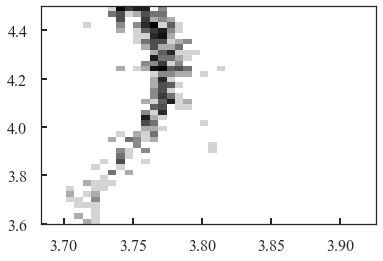

In [109]:
plt.hist2d(data['log10_teff'][(data['vphi']<50.)&(data['Z']>-0.6)&fltr],
           data['logg'][(data['vphi']<50.)&(data['Z']>-0.6)&fltr],bins=40,norm=LogNorm());

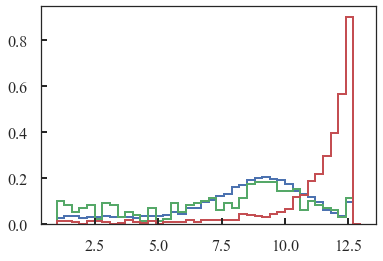

In [101]:
plt.hist(np.power(10.,data['log10_age'])[
        (data['vphi']<150.)&(data['vphi']>50.)&(data['Z']>-0.6)&fltr],
         range=[1.,13.],bins=40,histtype='step',lw=2,normed=True);
plt.hist(np.power(10.,data['log10_age'])[(data['vphi']<0.)&(data['Z']>-0.6)&fltr],
         range=[1.,13.],bins=40,histtype='step',lw=2,normed=True);
plt.hist(np.power(10.,data['log10_age'])[(data['vphi']<0.)&(data['Z']<-0.7)&fltr],
         range=[1.,13.],bins=40,histtype='step',lw=2,normed=True);

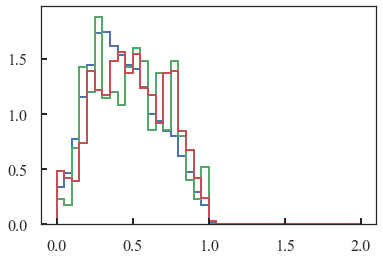

In [75]:
plt.hist(np.abs(data['z'])[(data['vphi']<150.)&(data['vphi']>50.)&(data['Z']>-0.6)&fltr],
         range=[0.,2.],bins=40,histtype='step',lw=2,normed=True);
plt.hist(np.abs(data['z'])[(data['vphi']<0.)&(data['Z']>-0.6)&fltr],
         range=[0.,2.],bins=40,histtype='step',lw=2,normed=True);
plt.hist(np.abs(data['z'])[(data['vphi']<0.)&(data['Z']<-0.7)&fltr],
         range=[0.,2.],bins=40,histtype='step',lw=2,normed=True);


# plt.hist(data['vphi'][data['Z']<-0.6],range=[-300.,300.],bins=40,histtype='step',lw=2);
# plt.hist(data['vphi'][data['Z']<-1.5],range=[-300.,300.],bins=40,histtype='step',lw=2);

# plt.semilogy()